In [1]:
import pandas as pd
df=pd.read_csv('amazonm_musical_instruments_reviews.csv')
df

,reviewerID,reviewerName,reviewText,overall,summary,reviewTime
0,A2IBPI20UZIR0sdfU,john,yujklnhbj kg,5,vnbmfghjk,"02 28, 2019"
1,A2IBPI20UZIR0U,"cassandra tu ""Yeah, well, that's just like, u...","Not much to write about here, but it does exac...",5,good,"02 28, 2014"
2,A14VAT5EAX3D9S,Jake,The product does exactly as it should and is q...,5,Jake,"03 16, 2013"
3,A195EZSQDW3E21,"Rick Bennette ""Rick Bennette""",The primary job of this device is to block the...,5,It Does The Job Well,"08 28, 2013"
4,A2C00NNG1ZQQG2,"RustyBill ""Sunday Rocker""",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,"02 14, 2014"
...,...,...,...,...,...,...
10257,A14B2YH83ZXMPP,Lonnie M. Adams,"Great, just as expected. Thank to all.",5,Five Stars,"07 20, 2014"
10258,A1RPTVW5VEOSI,Michael J. Edelman,I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...","07 2, 2014"
10259,AWCJ12KBO5VII,Michael L. Knapp,I have tried coated strings in the past ( incl...,4,Good for coated.,"07 22, 2014"
10260,A2Z7S8B5U4PAKJ,"Rick Langdon ""Scriptor""","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,"07 1, 2014"


In [2]:
import tweepy
import pandas as pd
from wordcloud import WordCloud
from textblob import TextBlob
import re
from nltk import FreqDist
import matplotlib.pyplot as plt
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize



In [3]:
# Create a dictionary with the API credentials
creds = {
    'consumerKey': df['reviewText'][0],
    'consumerSecret': df['reviewText'][1],
    'accessToken': df['reviewText'][2],
    'accessTokenSecret': df['reviewText'][3]
}

# Assign the values from the dictionary to variables
consumer_key = creds['consumerKey']
consumer_secret = creds['consumerSecret']
access_token = creds['accessToken']
access_token_secret = creds['accessTokenSecret']


In [4]:
import tweepy

# Set the consumer key, consumer secret, access token, and access token secret
consumer_key = "reviewText"
consumer_secret = "reviewText"
access_token = "reviewText"
access_token_secret = "reviewText"

# Create an authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Create the API object while passing in the auth information
api = tweepy.API(auth, wait_on_rate_limit=True)


In [5]:
import re

def clean_text(text):
   
    text = re.sub(r'@\w+', '', text) # remove @mentions
    text = re.sub(r'#\w+', '', text) # remove hashtags
    text = re.sub(r'RT\s+', '', text) # remove RT
    text = re.sub(r'https?://\S+', '', text) # remove hyperlinks
    text = re.sub(r'[^\w\s]', '', text) # remove other special characters
    text = re.sub(r'\s+', ' ', text) # replace multiple spaces with single space
    return text.strip()
df['reviewText'] = df['reviewText'].astype(str)


df


,reviewerID,reviewerName,reviewText,overall,summary,reviewTime
0,A2IBPI20UZIR0sdfU,john,yujklnhbj kg,5,vnbmfghjk,"02 28, 2019"
1,A2IBPI20UZIR0U,"cassandra tu ""Yeah, well, that's just like, u...","Not much to write about here, but it does exac...",5,good,"02 28, 2014"
2,A14VAT5EAX3D9S,Jake,The product does exactly as it should and is q...,5,Jake,"03 16, 2013"
3,A195EZSQDW3E21,"Rick Bennette ""Rick Bennette""",The primary job of this device is to block the...,5,It Does The Job Well,"08 28, 2013"
4,A2C00NNG1ZQQG2,"RustyBill ""Sunday Rocker""",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,"02 14, 2014"
...,...,...,...,...,...,...
10257,A14B2YH83ZXMPP,Lonnie M. Adams,"Great, just as expected. Thank to all.",5,Five Stars,"07 20, 2014"
10258,A1RPTVW5VEOSI,Michael J. Edelman,I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...","07 2, 2014"
10259,AWCJ12KBO5VII,Michael L. Knapp,I have tried coated strings in the past ( incl...,4,Good for coated.,"07 22, 2014"
10260,A2Z7S8B5U4PAKJ,"Rick Langdon ""Scriptor""","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,"07 1, 2014"


In [6]:
analyzer = SentimentIntensityAnalyzer()

def getSentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores['compound']

df['Sentiment'] = df['reviewText'].apply(getSentiment)
df

,reviewerID,reviewerName,reviewText,overall,summary,reviewTime,Sentiment
0,A2IBPI20UZIR0sdfU,john,yujklnhbj kg,5,vnbmfghjk,"02 28, 2019",0.0000
1,A2IBPI20UZIR0U,"cassandra tu ""Yeah, well, that's just like, u...","Not much to write about here, but it does exac...",5,good,"02 28, 2014",0.6903
2,A14VAT5EAX3D9S,Jake,The product does exactly as it should and is q...,5,Jake,"03 16, 2013",0.9588
3,A195EZSQDW3E21,"Rick Bennette ""Rick Bennette""",The primary job of this device is to block the...,5,It Does The Job Well,"08 28, 2013",-0.7003
4,A2C00NNG1ZQQG2,"RustyBill ""Sunday Rocker""",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,"02 14, 2014",0.5859
...,...,...,...,...,...,...,...
10257,A14B2YH83ZXMPP,Lonnie M. Adams,"Great, just as expected. Thank to all.",5,Five Stars,"07 20, 2014",0.7650
10258,A1RPTVW5VEOSI,Michael J. Edelman,I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...","07 2, 2014",0.9955
10259,AWCJ12KBO5VII,Michael L. Knapp,I have tried coated strings in the past ( incl...,4,Good for coated.,"07 22, 2014",0.8164
10260,A2Z7S8B5U4PAKJ,"Rick Langdon ""Scriptor""","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,"07 1, 2014",0.7517


In [7]:
def getSentiment(value):
    return 'negative' if value < 0 else 'neutral' if value == 0 else 'positive'

df['Analysis'] = df['Sentiment'].apply(getSentiment)
df

,reviewerID,reviewerName,reviewText,overall,summary,reviewTime,Sentiment,Analysis
0,A2IBPI20UZIR0sdfU,john,yujklnhbj kg,5,vnbmfghjk,"02 28, 2019",0.0000,neutral
1,A2IBPI20UZIR0U,"cassandra tu ""Yeah, well, that's just like, u...","Not much to write about here, but it does exac...",5,good,"02 28, 2014",0.6903,positive
2,A14VAT5EAX3D9S,Jake,The product does exactly as it should and is q...,5,Jake,"03 16, 2013",0.9588,positive
3,A195EZSQDW3E21,"Rick Bennette ""Rick Bennette""",The primary job of this device is to block the...,5,It Does The Job Well,"08 28, 2013",-0.7003,negative
4,A2C00NNG1ZQQG2,"RustyBill ""Sunday Rocker""",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,"02 14, 2014",0.5859,positive
...,...,...,...,...,...,...,...,...
10257,A14B2YH83ZXMPP,Lonnie M. Adams,"Great, just as expected. Thank to all.",5,Five Stars,"07 20, 2014",0.7650,positive
10258,A1RPTVW5VEOSI,Michael J. Edelman,I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...","07 2, 2014",0.9955,positive
10259,AWCJ12KBO5VII,Michael L. Knapp,I have tried coated strings in the past ( incl...,4,Good for coated.,"07 22, 2014",0.8164,positive
10260,A2Z7S8B5U4PAKJ,"Rick Langdon ""Scriptor""","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,"07 1, 2014",0.7517,positive


In [8]:
df=df.head(500)
positive_tweets = [tweet for i, tweet in enumerate(df['reviewText']) if df['Analysis'][i] == 'positive']
for i, tweet in enumerate(positive_tweets):
    print(f"{i+1}){tweet}\n")


1)Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,

2)The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]

3)Nice windscreen protects my MXL mic and prevents pops. Only thing is that the gooseneck is only marginally able to hold the screen in position and requires careful positioning of

In [9]:
df=df.head(500)
negative_tweets = [tweet for i, tweet in enumerate(df['reviewText']) if df['Analysis'][i] == 'negative']
for i, tweet in enumerate(negative_tweets):
    print(f"{i+1}){tweet}\n")

1)The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volume or high frequencies. The double cloth filter blocks the pops and lets the voice through with no coloration. The metal clamp mount attaches to the mike stand secure enough to keep it attached. The goose neck needs a little coaxing to stay where you put it.

2)I have used monster cables for years, and with good reason. The lifetime warranty is worth the price alone. Simple fact: cables break, but getting to replace them at no cost is where it's at.

3)Cant go wrong. Great quality on a budget price  - Hosa is the go to when you need to hook things up

4)The ends of the midi cable look and feel like quality. Connection is secure, no worries about uneven connections, it also detaches without a hitch. Highly recommended.

5)These are not the greatest but they're cheap and they get to you fast when you need them.

In [10]:
df=df.head(500)
neutral_tweets = [tweet for i, tweet in enumerate(df['reviewText']) if df['Analysis'][i] == 'neutral']
for i, tweet in enumerate(neutral_tweets):
    print(f"{i+1}){tweet}\n")

1)yujklnhbj kg 

2)I bought this to use in my home studio to control my midi keyboard. It does just what I wanted it to do.

3)...unbalanced guitar cable is notoriously noisy especially around florescent lights. These are no different. I would prefer to use cables with better shielding but cannot justify the expense considering how rarely these things get used.

4)plugged it in and it works to connect a mono line out to the stereo input on a Lepai amp. not much else I can tell you

5)I carry this in my bass gig bag so I can plug my phone into the mono aux-input on the back of my Genz Benz bass head. Handy for rehearsals when the band needs to listen to a track while working out an arrangement (my bass cab is full range fEARful 15/6/1). Before picking this up, I used a couple of cables / adapters to go from stereo 1/8&#34;  to mono 1/4&#34; and it often seemed I never had quite what I needed on hand.

6)Just a basic female XLR to 1/4 inch male adapter. I use these so I can plug my regul

In [11]:
print(df.columns)

Index(['reviewerID', 'reviewerName', 'reviewText', 'overall', 'summary',
       'reviewTime', 'Sentiment', 'Analysis'],
      dtype='object')


In [12]:
from textblob import TextBlob

def getSentiment(tweet):
    # Use TextBlob library for sentiment analysis
    blob = TextBlob(tweet)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score < 0:
        return 'negative'
    elif sentiment_score == 0:
        return 'neutral'
    else:
        return 'positive'

# Get a new tweet from the user
new_tweet = input("Enter a new tweet: ")

# Predict sentiment of new tweet
Sentiment = getSentiment(new_tweet)

# Determine sentiment based on score
if Sentiment == 'negative':
    print("The tweet has a negative sentiment.")
elif Sentiment == 'neutral':
    print("The tweet has a neutral sentiment.")
else:
    print("The tweet has a positive sentiment.")


Enter a new tweet: bad book
The tweet has a negative sentiment.


In [14]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [15]:
# Load the dataset
df = pd.read_csv('amazonm_musical_instruments_reviews.csv')

In [16]:
df.dropna(subset=['reviewText'], inplace=True)
# Preprocess the tweets
stop_words = nltk.corpus.stopwords.words('english')

def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = ' '.join(word for word in tweet.split() if word not in stop_words)
    tweet = ''.join(char for char in tweet if char.isalnum() or char.isspace())
    return tweet

df['reviewText'] = df['reviewText'].apply(preprocess_tweet)

In [17]:
# Split the dataset into training and testing sets
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

In [18]:
# Extract features using bag-of-words
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['reviewText'])
X_test = vectorizer.transform(test_df['reviewText'])
y_train = train_df['reviewText']
y_test = test_df['reviewText']

In [19]:
# Train the Naïve Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [20]:
# Test the Naïve Bayes classifier
y_pred = nb_classifier.predict(X_test)

In [27]:
# Evaluate the performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro', zero_division=1))
print('Recall:', recall_score(y_test, y_pred, average='macro', zero_division=1))


Accuracy: 0.0
Precision: 0.9276018099547512
Recall: 0.07239819004524888


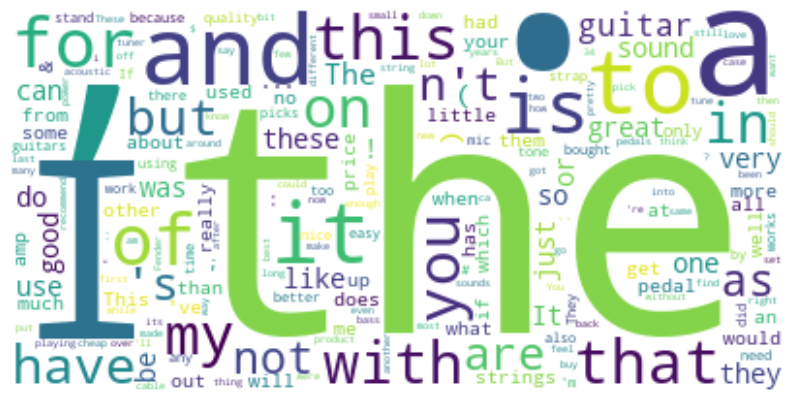

In [23]:
# Load the dataset
df = pd.read_csv('amazonm_musical_instruments_reviews.csv')

# Convert the 'reviewText' column to string data type
df['reviewText'] = df['reviewText'].astype(str)

# Join all the review titles into a single string
allWords = ' '.join(df['reviewText'].tolist())

# Tokenize the text into words
words = word_tokenize(allWords)

# Generate a frequency distribution of words
freq_dist = FreqDist(words)

# Generate the word cloud
wordcloud = WordCloud(background_color='white').generate_from_frequencies(freq_dist)

# Plot the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
